In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv("/content/drive/MyDrive/Project Soccer/PLAYERS.csv")

In [4]:
df.shape

(671, 25)

/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


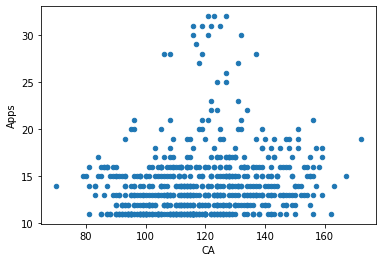

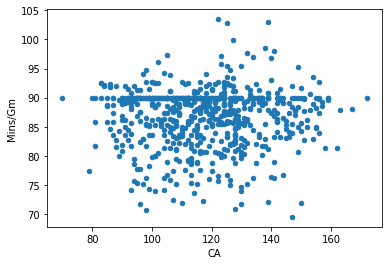

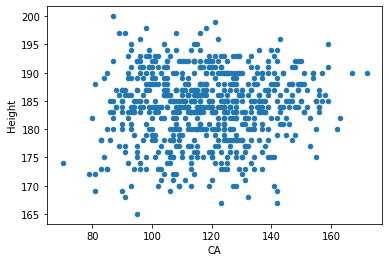

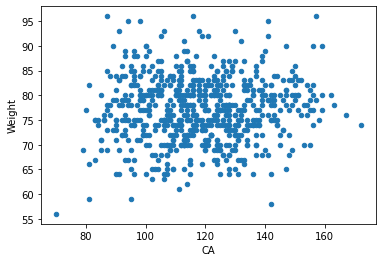

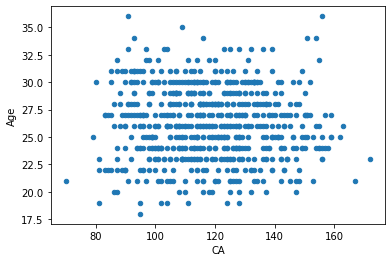

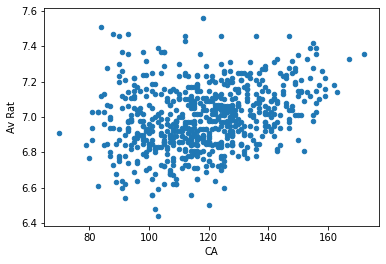

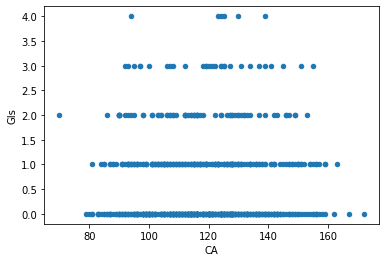

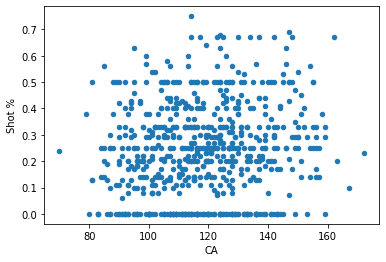

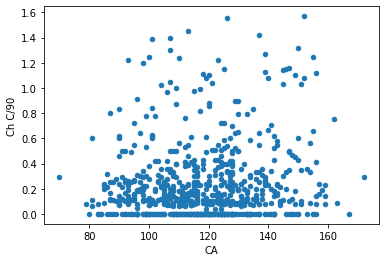

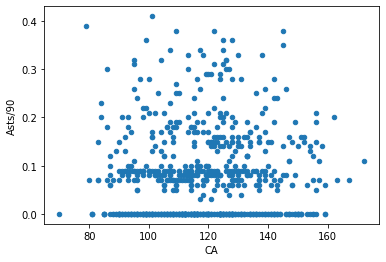

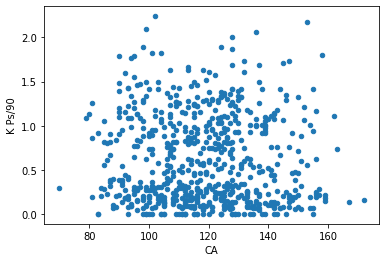

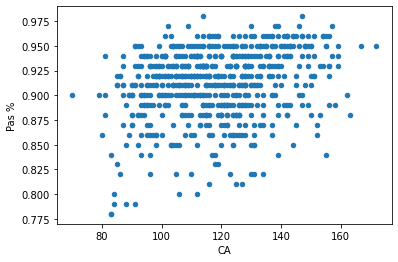

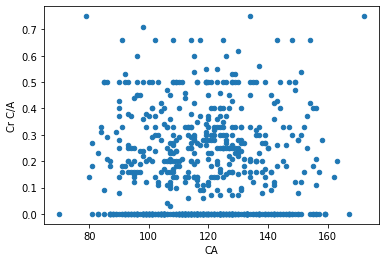

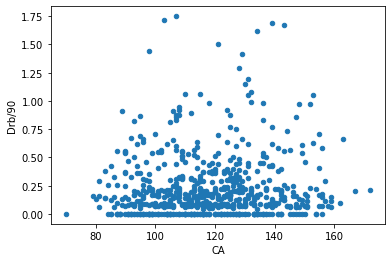

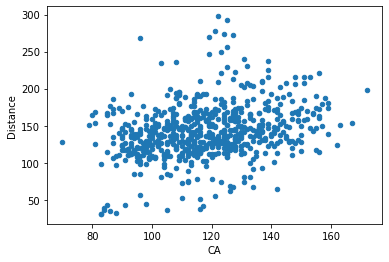

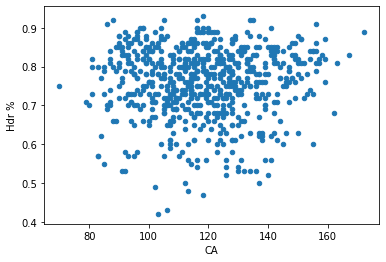

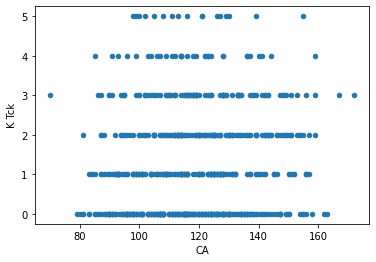

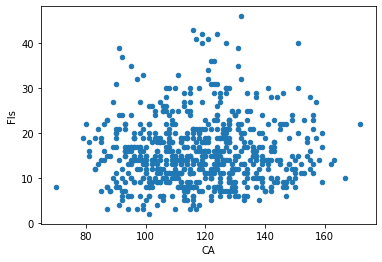

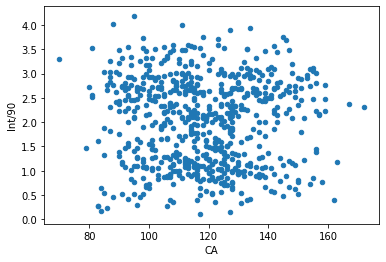

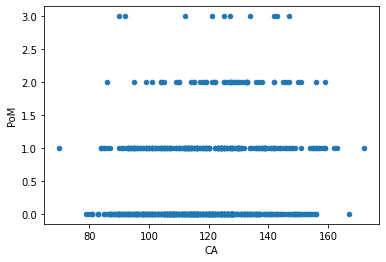

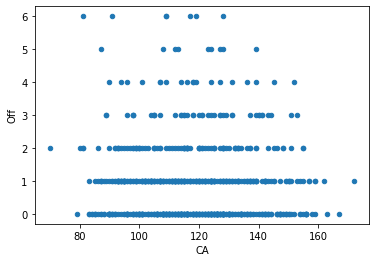

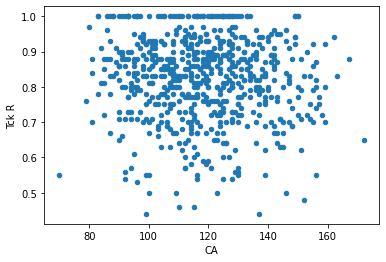

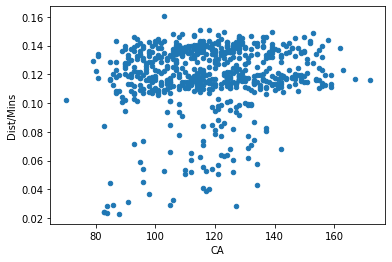

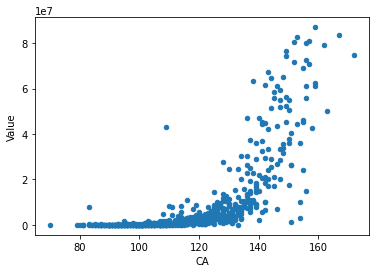

In [5]:
# Loop over all the columns in the DataFrame
for column in df.columns:
    if column == "CA":
        continue
    df.plot(kind='scatter', x='CA', y=column)

# Show the plot
plt.show()

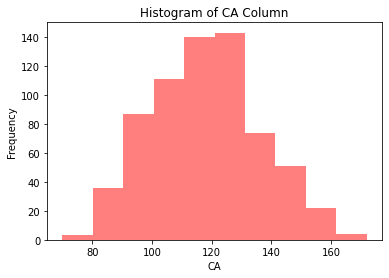

In [6]:
plt.hist(df['CA'],  color='red', alpha=0.5)
plt.xlabel('CA')
plt.ylabel('Frequency')
plt.title('Histogram of CA Column')
plt.show()

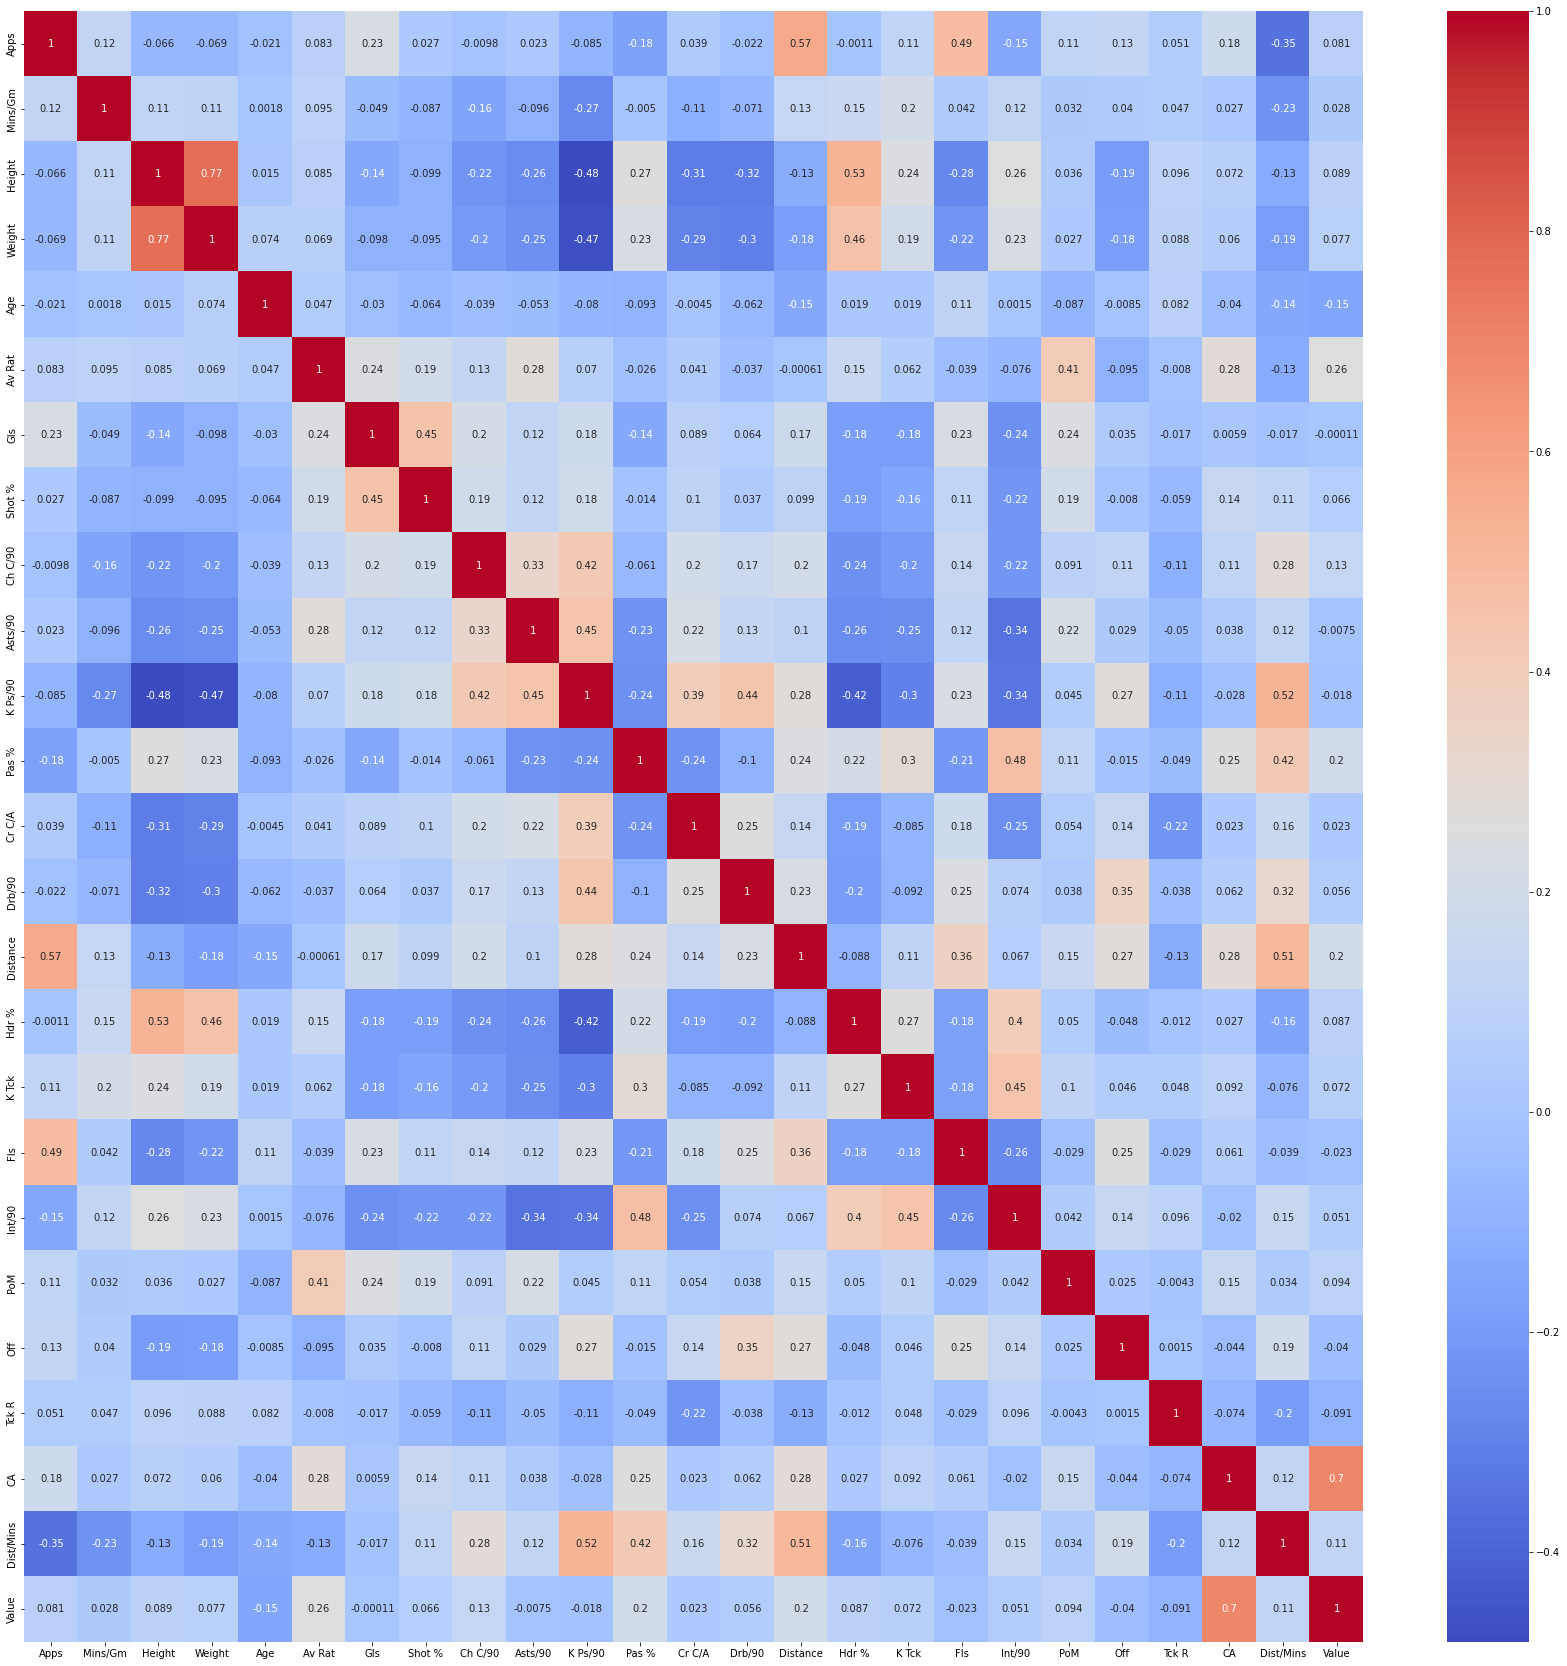

In [7]:
import seaborn as sns
plt.figure(figsize=(30,30))

# Calculate the correlations between the variables
corr = df.corr()

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

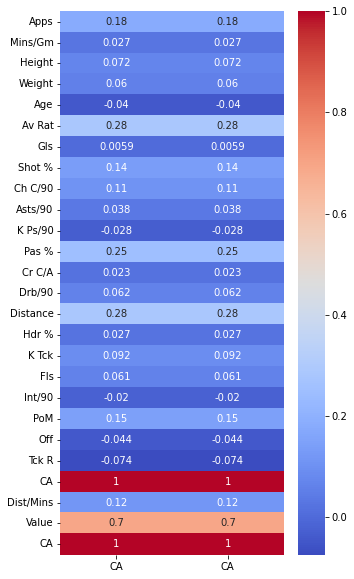

In [8]:
# Extract the target variable
plt.figure(figsize=(5,10))
target = df['CA']

# Concatenate the target variable with the dataframe
df = pd.concat([df, target], axis=1)

# Calculate the correlations between the variables and the target variable
corr = df.corr()

# Plot the heatmap
sns.heatmap(corr[['CA']], annot=True, cmap='coolwarm')

In [9]:
X = df.drop("CA",axis=1)   #Feature Matrix
y = df["CA"]

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42)

Data Is Non Linear To Target Variable Trying Linera Regession How Model Works



In [30]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [35]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [37]:
y_pred = reg.predict(X_test)


In [38]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 10.770560891708723


In [39]:
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)


R2 Score: 0.527656377416376


In [41]:
n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R2 Score:", adj_r2)

Adjusted R2 Score: 0.4483819232764672


In [42]:
reg_lasso = Lasso(alpha=0.1)
reg_lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [43]:
reg_lasso = Lasso(alpha=0.1)
reg_lasso.fit(X_train, y_train)

In [44]:
reg_ridge = Ridge(alpha=0.1)
reg_ridge.fit(X_train, y_train)

Ridge(alpha=0.1)

In [45]:
y_pred_ridge = reg_ridge.predict(X_test)

In [46]:
mae = mean_absolute_error(y_test, y_pred_ridge)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 10.770351682480197


In [47]:
r2 = r2_score(y_test, y_pred_ridge)
print("R2 Score:", r2)

R2 Score: 0.5276738133570895


Gradient Boosting

In [48]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import RFE